<img src = "https://evangsmailoa.files.wordpress.com/2019/09/ml.png"  align = "center">

#<center>K-Nearest Neighbors</center>
Dalam latihan ini kita akan lakukan klasifikasi dengan menggunakan algoritma KNN. Kita akan melihat data dari 'tetangga' terdekatnya. 
<p>Seperti biasa, kita <b>import library</b> terlebih dahulu:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics




Terdapat 4 provider telekomunikasi. Konsumen-konsumen mereka mempunyai data-data yang dapat kita lihat. Si A dengan karater seperti ini akan memilih provider 1 (misalnya), kemudian si B dengan karakter berbeda akan memilih provider 3, dst. Nah, kita ingin melihat customer baru cenderung akan memilih provider telekomunikasi yang mana. Kita gunakan KNN untuk klasifikasi data konsumen baru. 

Nah untuk kasus ini, kita butuh untuk download contoh dataset. Untuk download kita gunakan !wget. Datasetnya kita ambil dari IBM Object Storage.

In [6]:
pip install wget

In [8]:
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


### Load Data dari file CSV  
Sebelum datanya dapat kita gunakan, kita harus gunakan alamat url untuk ambil  **teleCust1000t.csv**

In [2]:
df = pd.read_csv('teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### Analisa dan Visualisasi Data
Kita tampilkan jumlah konsumen dari masing-masing kategori (**custcat**).

In [3]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

Terlihat bahwa sebanyak 281 konsumen milih Plus Service, 266 konsumen Basic-service, 236 konsumen Total Service, dan 217 konsumen memilih E-Service customers. Setelah dapat jumlah konsumen untuk masing-masing provider, selanjutnyab kita tampilkan data histogramnya.

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

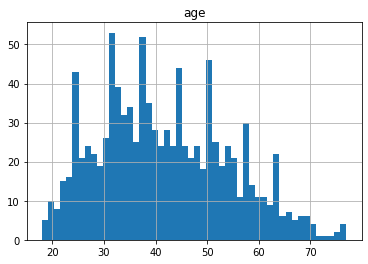

In [6]:
df.hist(column='age', bins=50)

Selanjutnya kita cek fitur data, X.

In [7]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

Selanjutnya kita gunakan librari **scikit-learn**, kita harus ubah **data frame Pandas** menjadi **array numpy**: 

In [8]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

Lalu labelnya?

In [9]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

Kita lakukan standarisasi data dengan memanggil **StandardScaler**.

In [10]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

### Train Test Split  
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


#Classification

**Fase training**
<p>Kita coba algoritma KNN dengan k=3:



In [12]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

**Fase testing**
<p>Kita gunakan model ini untuk prediksi test:

In [13]:
yhat = neigh.predict(X_test)
yhat[0:50]

array([1, 3, 1, 4, 4, 3, 4, 4, 2, 4, 1, 4, 2, 1, 3, 1, 2, 4, 1, 4, 3, 3,
       1, 4, 1, 2, 1, 1, 1, 1, 3, 1, 4, 1, 3, 2, 3, 1, 2, 3, 1, 2, 1, 1,
       2, 1, 2, 3, 4, 4], dtype=int64)

**Menghitung akurasi**
<p>dalam klasifikasi dengan banyak label (multilabel classification), fungsi <b>accuracy classification score</b> sangat penting. <p>Fungsi ini sama dengan fungsi <b>jaccard similarity score</b>. Kalau lupa, sila baca materi lagi ya....

In [14]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.56875
Test set Accuracy:  0.315


## Latihan
Coba bikin model lagi dengan k=6!

In [ ]:
# Tulis kodingnya di sini!

#### Bagaimana cara nyari K yang paling tepat?
<b>K</b> untuk mengetahui berapa 'tetangga' yang dapat kita gunakan untuk segmentasi. Oleh karenanya, pilih <b>K</b> harus tepat! Caranya, pilih k =1, gunakan fase training untuk pemodelan, kemudian hitung akurasi prediksi dnegan semua sample di test set. Ulangi proses tersebut tetapi tambahkan satu <b>K</b>. Kalau semula 1, menjadi 2, kemudian menjadi 3, dst., sampai kita dapatkan nilai akurasi terbaik.

In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model kemudian Prediksi  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

#### Plot  model akurasi untuk nilai K yang berbeda-beda

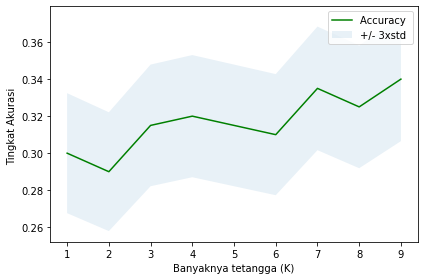

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Tingkat Akurasi ')
plt.xlabel('Banyaknya tetangga (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "Akurasi terbaik adalah", mean_acc.max(), "dengan k=", mean_acc.argmax()+1) 

Akurasi terbaik adalah 0.34 dengan k= 9


# <h2 id="(c)">(c)</h2>
<p>Copyright &copy; 2019 <b>Evangs Mailoa</b>.</p>

---


<p>Digunakan khusus untuk ngajar Machine Learning di Progdi Teknik Informatika - FTI UKSW</p>